In [2]:
import pandas as pd


## 数据描述性统计

In [3]:
data0 = pd.read_csv("medical_insurance.csv")
print("数据的特征有：", data0.info(), sep='\n')
# 划分：70% 训练   20% 测试  10% 预测 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 54 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   person_id                    100000 non-null  int64  
 1   age                          100000 non-null  int64  
 2   sex                          100000 non-null  object 
 3   region                       100000 non-null  object 
 4   urban_rural                  100000 non-null  object 
 5   income                       100000 non-null  float64
 6   education                    100000 non-null  object 
 7   marital_status               100000 non-null  object 
 8   employment_status            100000 non-null  object 
 9   household_size               100000 non-null  int64  
 10  dependents                   100000 non-null  int64  
 11  bmi                          100000 non-null  float64
 12  smoker                       100000 non-null  object 
 13  

In [6]:
# 提取各种特征
df = data0.iloc[:, 1:]
object_columns = df.dtypes[df.dtypes == 'object'].index.tolist()
float_columns = df.dtypes[df.dtypes == "float64"].index.tolist()
int_columns = df.dtypes[df.dtypes == 'int'].index.tolist()
print(f"非数值型特征:\n{object_columns} \n浮点型特征:\n{float_columns}\n整数型特征:\n{int_columns}")
print(f"非数值型特征数量: {len(object_columns)} \n浮点型特征数量: {len(float_columns)} \n整数型特征数量: {len(int_columns)}")


非数值型特征:
['sex', 'region', 'urban_rural', 'education', 'marital_status', 'employment_status', 'smoker', 'alcohol_freq', 'plan_type', 'network_tier'] 
浮点型特征:
['income', 'bmi', 'systolic_bp', 'diastolic_bp', 'ldl', 'hba1c', 'provider_quality', 'risk_score', 'annual_medical_cost', 'annual_premium', 'monthly_premium', 'avg_claim_amount', 'total_claims_paid']
整数型特征:
['age', 'household_size', 'dependents', 'visits_last_year', 'hospitalizations_last_3yrs', 'days_hospitalized_last_3yrs', 'medication_count', 'deductible', 'copay', 'policy_term_years', 'policy_changes_last_2yrs', 'claims_count', 'chronic_count', 'hypertension', 'diabetes', 'asthma', 'copd', 'cardiovascular_disease', 'cancer_history', 'kidney_disease', 'liver_disease', 'arthritis', 'mental_health', 'proc_imaging_count', 'proc_surgery_count', 'proc_physio_count', 'proc_consult_count', 'proc_lab_count', 'is_high_risk', 'had_major_procedure']
非数值型特征数量: 10 
浮点型特征数量: 13 
整数型特征数量: 30


In [7]:
print("=== 非数值型特征的取值分布 ===")
for col in object_columns:
    print(f" \n特征 {col} 的可取值为： {df[col].unique()}, 个数为: {df[col].nunique()}.")

=== 非数值型特征的取值分布 ===
 
特征 sex 的可取值为： ['Female' 'Male' 'Other'], 个数为: 3.
 
特征 region 的可取值为： ['North' 'Central' 'West' 'South' 'East'], 个数为: 5.
 
特征 urban_rural 的可取值为： ['Suburban' 'Urban' 'Rural'], 个数为: 3.
 
特征 education 的可取值为： ['Doctorate' 'No HS' 'HS' 'Some College' 'Masters' 'Bachelors'], 个数为: 6.
 
特征 marital_status 的可取值为： ['Married' 'Single' 'Divorced' 'Widowed'], 个数为: 4.
 
特征 employment_status 的可取值为： ['Retired' 'Employed' 'Self-employed' 'Unemployed'], 个数为: 4.
 
特征 smoker 的可取值为： ['Never' 'Current' 'Former'], 个数为: 3.
 
特征 alcohol_freq 的可取值为： [nan 'Weekly' 'Daily' 'Occasional'], 个数为: 3.
 
特征 plan_type 的可取值为： ['PPO' 'POS' 'HMO' 'EPO'], 个数为: 4.
 
特征 network_tier 的可取值为： ['Bronze' 'Gold' 'Platinum' 'Silver'], 个数为: 4.


In [8]:
print("=== int 数值型特征的取值分布 ===")
for col in int_columns:
    print(f" \n特征 {col} 的可取值为： {df[col].unique()}, 个数为: {df[col].nunique()}.")

=== int 数值型特征的取值分布 ===
 
特征 age 的可取值为： [ 52  79  68  15  53  63  36  21  28  34  69  50  33  59  24  54  61  32
  42  43  45  39  76  60  82  56  57  40  64  46  84  71  72  44  55  12
  35  48  51  49  30  19  81  37  62  31  41  10  58  26  25  38  74  29
  78  47  23  67  65   6  22  88  66  16  73  13  75  70  27  91  20  80
  77  14  96   0  83   2   5  18   7  93  17   3  95   4  94 100  90  11
  87  86  85   8   9  98  99  92  89  97   1], 个数为: 101.
 
特征 household_size 的可取值为： [3 5 2 1 4 6 7 8 9], 个数为: 9.
 
特征 dependents 的可取值为： [1 3 0 2 4 5 6 7], 个数为: 8.
 
特征 visits_last_year 的可取值为： [ 2  1  0  3  8  4  6  5  7 12  9 10 14 11 15 16 13 18 17 19 25 22], 个数为: 22.
 
特征 hospitalizations_last_3yrs 的可取值为： [0 1 2 3], 个数为: 4.
 
特征 days_hospitalized_last_3yrs 的可取值为： [ 0  3  2  5 12  4  1  6  7  8 10 14  9 18 21 15], 个数为: 16.
 
特征 medication_count 的可取值为： [ 4  3  1  2  0  6  5  7  9  8 11 10], 个数为: 12.
 
特征 deductible 的可取值为： [1000  500 2000 5000], 个数为: 4.
 
特征 copay 的可取值为： [20 10 30 50], 个数为:

In [16]:
print("=== float 数值型特征的取值分布 ===")
for col in float_columns:
    print(f" \n特征 {col} 的可取值为： {df[col].describe()}.")

=== float 数值型特征的取值分布 ===
 
特征 income 的可取值为： count    1.000000e+05
mean     4.987390e+04
std      4.680021e+04
min      1.100000e+03
25%      2.110000e+04
50%      3.620000e+04
75%      6.220000e+04
max      1.061800e+06
Name: income, dtype: float64.
 
特征 bmi 的可取值为： count    100000.000000
mean         26.990512
std           4.994883
min          12.000000
25%          23.600000
50%          27.000000
75%          30.400000
max          50.400000
Name: bmi, dtype: float64.
 
特征 systolic_bp 的可取值为： count    100000.000000
mean        117.808970
std          15.369187
min          61.000000
25%         107.000000
50%         117.000000
75%         128.000000
max         183.000000
Name: systolic_bp, dtype: float64.
 
特征 diastolic_bp 的可取值为： count    100000.000000
mean         73.604770
std           8.900924
min          40.000000
25%          67.000000
50%          73.000000
75%          79.000000
max         114.000000
Name: diastolic_bp, dtype: float64.
 
特征 ldl 的可取值为： count    100000.000

In [26]:
# 1. 筛选出所有不合理的记录
reasonable_records = df[(df['age'] < 18) | (df['age'] >90)]
print(len(reasonable_records))
# # 2. 查看这些记录的数量和占比
# count_reasonable = len(reasonable_records)
# total_records = len(df[(df['age'] <= 18)])
# percentage_unreasonable = (count_reasonable / total_records) * 100
# print(f"合理记录的数量: {count_reasonable}")
# print(f"合理记录的占比: {percentage_unreasonable:.2f}%")

3393


In [28]:
len(df[(df['age'] <= 18)]), len(df[(df['age'] < 18)]), len(df[(df['age'] > 90)]), 

(3514, 3044, 349)

In [29]:
len(df[(df['age'] < 20) & (df['education'] == 'PhD')])


0

/tmp/ipykernel_20395/2450550186.py:20: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_20395/2450550186.py:20: UserWarning: Glyph 24067 (\N{CJK UNIFIED IDEOGRAPH-5E03}) missing from current font.
  plt.tight_layout()
/home/chenchunmei/Desktop/da_venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/chenchunmei/Desktop/da_venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24067 (\N{CJK UNIFIED IDEOGRAPH-5E03}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


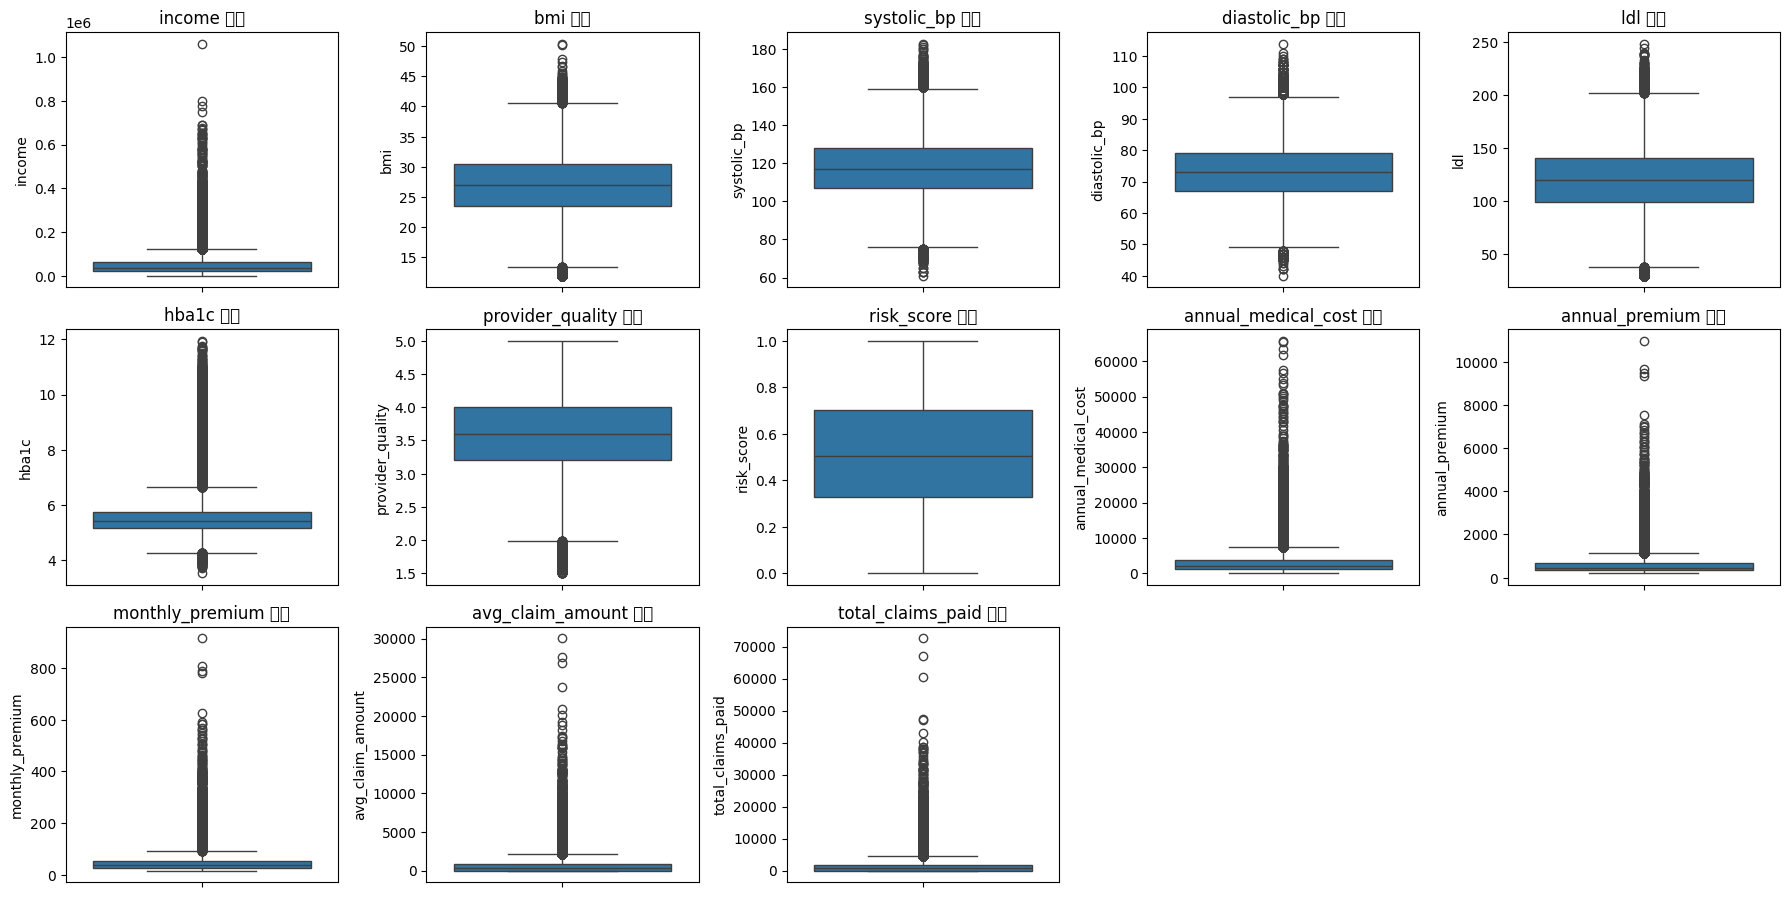

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


fig, axes = plt.subplots(4, 5, figsize=(18, 12))  # 2行3列
axes = axes.ravel()  # 将二维数组展平为一维

# 为每个特征单独绘制箱线图
for i, feature in enumerate(float_columns):
    sns.boxplot(data=df, y=feature, ax=axes[i])
    axes[i].set_title(f'{feature} 分布')
    axes[i].set_ylabel(feature)

# 隐藏多余的子图
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

/tmp/ipykernel_20395/1256636984.py:18: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_20395/1256636984.py:18: UserWarning: Glyph 24067 (\N{CJK UNIFIED IDEOGRAPH-5E03}) missing from current font.
  plt.tight_layout()
/home/chenchunmei/Desktop/da_venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/chenchunmei/Desktop/da_venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24067 (\N{CJK UNIFIED IDEOGRAPH-5E03}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


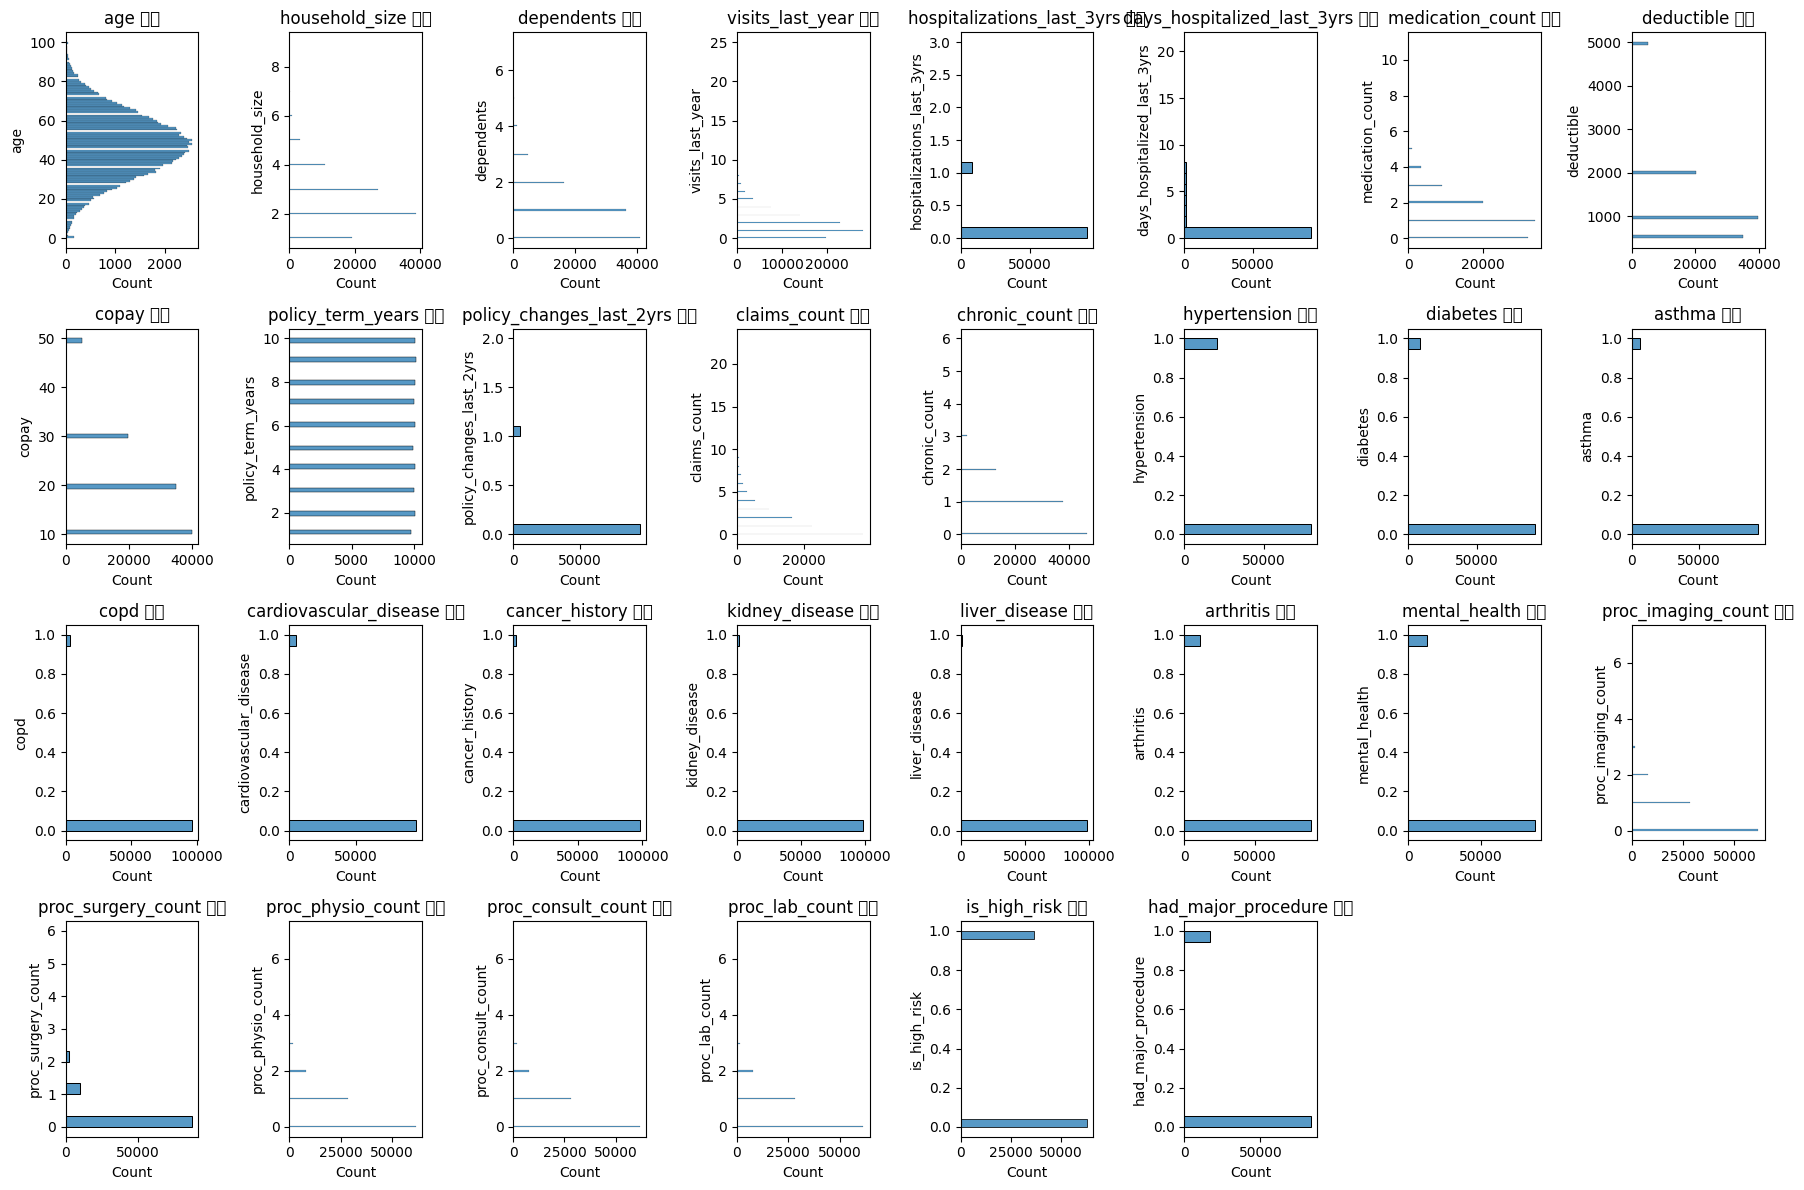

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


fig, axes = plt.subplots(4, 8, figsize=(18, 12))  # 2行3列
axes = axes.ravel()  # 将二维数组展平为一维

# 为每个特征单独绘制箱线图
for i, feature in enumerate(int_columns):
    sns.histplot(data=df, y=feature, ax=axes[i])
    axes[i].set_title(f'{feature} 分布')
    axes[i].set_ylabel(feature)

# 隐藏多余的子图
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


In [34]:
sns.heatmap(df[df.dtypes != 'object'])

/tmp/ipykernel_20395/884743623.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.heatmap(df[df.dtypes != 'object'])


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

## 数据预处理

In [35]:
print("=== 非数值型特征的取值分布 ===")
for col in object_columns:
    print(f" \n特征 {col} 的可取值为： {df[col].unique()}, 个数为: {df[col].nunique()}.")


=== 非数值型特征的取值分布 ===
 
特征 sex 的可取值为： ['Female' 'Male' 'Other'], 个数为: 3.
 
特征 region 的可取值为： ['North' 'Central' 'West' 'South' 'East'], 个数为: 5.
 
特征 urban_rural 的可取值为： ['Suburban' 'Urban' 'Rural'], 个数为: 3.
 
特征 education 的可取值为： ['Doctorate' 'No HS' 'HS' 'Some College' 'Masters' 'Bachelors'], 个数为: 6.
 
特征 marital_status 的可取值为： ['Married' 'Single' 'Divorced' 'Widowed'], 个数为: 4.
 
特征 employment_status 的可取值为： ['Retired' 'Employed' 'Self-employed' 'Unemployed'], 个数为: 4.
 
特征 smoker 的可取值为： ['Never' 'Current' 'Former'], 个数为: 3.
 
特征 alcohol_freq 的可取值为： [nan 'Weekly' 'Daily' 'Occasional'], 个数为: 3.
 
特征 plan_type 的可取值为： ['PPO' 'POS' 'HMO' 'EPO'], 个数为: 4.
 
特征 network_tier 的可取值为： ['Bronze' 'Gold' 'Platinum' 'Silver'], 个数为: 4.


In [ ]:
# 用众数替代特征 alcohol_freq 的缺失值
alc_f = df['alcohol_freq'].mode()[0]
df['alcohol_freq'].fillna(alc_f, inplace=True)
print(f"\n已用众数 '{alc_f}' 填充 alcohol_freq 的缺失值.")

In [ ]:
import numpy as np
from sklearn.preprocessing import OrdinalEncoder


## 需要进行序号编码的有序变量
# **关键：必须按照逻辑顺序排列类别**
ordinal_features = {
    'education': ['No HS', 'HS', 'Some College', 'Bachelors', 'Masters', 'Doctorate'], # 高中以下 > 高中 > 大专 > 本科 > 硕士 > 博士
    'smoker': ['Never', 'Former', 'Current'], # 从不吸烟 -> 曾经吸烟 -> 当前吸烟 (风险递增)
    'alcohol_freq': ['Occasional', 'Weekly', 'Daily'], # 频率递增
    'network_tier': ['Bronze', 'Silver', 'Gold', 'Platinum'] # 等级递增
}

# 需要进行独热编码的名义变量
one_hot_features = ['sex', 'region', 'urban_rural', 'marital_status', 'employment_status', 'plan_type']


# 对有序变量进行序号编码
encoder = OrdinalEncoder(categories=[ordinal_features[feat] for feat in ordinal_features.keys()], dtype=np.int)
df[list(ordinal_features.keys())] = encoder.fit_transform(df[list(ordinal_features.keys())])


# 对名义变量进行独热编码
df_final = pd.get_dummies(df, columns=one_hot_features, drop_first=True, dtype=np.int64)


print(f"\n最终数据类型 (确认没有 object 类型):{df_final.dtypes=='object'}")

print("\n最终数据形状:", df_final.shape)


/tmp/ipykernel_20395/3519767407.py:19: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  encoder = OrdinalEncoder(categories=[ordinal_features[feat] for feat in ordinal_features.keys()], dtype=np.int)



--- 最终编码完成的数据 (前5行) ---
   age   income  education  household_size  dependents   bmi  smoker  \
0   52  22700.0          5               3           1  27.4       0   
1   79  12800.0          0               3           1  26.6       0   
2   68  40700.0          1               5           3  31.5       0   
3   15  15600.0          2               5           3  31.6       0   
4   53  89600.0          5               2           0  30.5       0   

   alcohol_freq  visits_last_year  hospitalizations_last_3yrs  ...  \
0             0                 2                           0  ...   
1             1                 2                           0  ...   
2             0                 1                           0  ...   
3             0                 0                           0  ...   
4             2                 3                           0  ...   

   urban_rural_Urban  marital_status_Married  marital_status_Single  \
0                  0                       1      

In [50]:
df_final.dtypes[df_final.dtypes == 'float']

income                 float64
bmi                    float64
systolic_bp            float64
diastolic_bp           float64
ldl                    float64
hba1c                  float64
provider_quality       float64
risk_score             float64
annual_medical_cost    float64
annual_premium         float64
monthly_premium        float64
avg_claim_amount       float64
total_claims_paid      float64
dtype: object